In [70]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import networkx as nx
import csv
import numpy as np
import community as community_louvain
from community.community_louvain import modularity
import statistics

# Lecture des données

In [31]:
def init_data_within():
    G = nx.Graph()
    with open('scc2034_kilifi_all_contacts_within_households.csv','r') as csvfile:
        plots = csv.reader(csvfile, delimiter = ',', skipinitialspace=True)
        next(plots, None)  # on passe la première ligne (le header)
        for row in plots:
            G.add_node(row[1])
            G.add_node(row[3])
            if G.has_edge(row[1],row[3]):
                G[row[1]][row[3]]['weight'] += 1
            else:
                G.add_edge(row[1], row[3],weight=1)
    return G

def init_data_facebook_combined():
    G = nx.Graph()
    with open('facebook_combined.txt','r') as txtfile:
        plots = csv.reader(txtfile, delimiter = ' ')
        for row in plots:
            if G.has_edge(row[0],row[1]):
                G[row[0]][row[1]]['weight'] += 1
            else:
                G.add_edge(row[0], row[1],weight=1)
    return G

def init_data_accross():
    G = nx.Graph()
    with open('scc2034_kilifi_all_contacts_across_households.csv','r') as csvfile:
        plots = csv.reader(csvfile, delimiter = ',', skipinitialspace=True)
        next(plots, None)  # on passe la première ligne (le header)
        for row in plots:
            G.add_node(row[1])
            G.add_node(row[3])
            if G.has_edge(row[1],row[3]):
                G[row[1]][row[3]]['weight'] += 1
            else:
                G.add_edge(row[1], row[3],weight=1)
    return G


# Coefficient de clustering 
## Dataset within

In [32]:
def display_nodes_edges_csv_within():
    G = init_data_within()
    G_nodes = G.number_of_nodes()
    G_edges = G.number_of_edges()
    print("Nodes = ", G_nodes, " Edges = ",G_edges)
    #permet d'afficher les noeuds et liens du Graphe G
    print(nx.info(G)) 
    #Affichage du coefficient de clustering du graphe (coeficient de 0 à 1)
    # le coefficient de regroupement local
    coefficient_de_regroupement_local = nx.clustering(G)
    print(f'coefficient de regroupement local : {coefficient_de_regroupement_local}')

    # le coefficient de regroupement moyen
    coef_moy = nx.average_clustering(G)
    print(f'coefficient de regroupement moyen : {coef_moy}')

# Ligne ci-desssous à décommenter pour tester
display_nodes_edges_csv_within()

Nodes =  47  Edges =  479
Name: 
Type: Graph
Number of nodes: 47
Number of edges: 479
Average degree:  20.3830
coefficient de regroupement local : {'2': 0.8761904761904762, '4': 0.46846846846846846, '16': 0.8666666666666667, '27': 0.605072463768116, '22': 0.9120879120879121, '9': 0.7124183006535948, '13': 0.9555555555555556, '11': 0.6900584795321637, '6': 0.5064935064935064, '20': 0.9393939393939394, '25': 0.5669515669515669, '15': 0.5490196078431373, '30': 0.5527065527065527, '10': 0.46288798920377866, '5': 0.5641025641025641, '17': 0.9545454545454546, '23': 0.9111111111111111, '1': 0.9285714285714286, '3': 0.64, '12': 0.7205882352941176, '7': 0.638095238095238, '8': 0.5454545454545454, '33': 0.8888888888888888, '43': 0.8102766798418972, '44': 0.7150997150997151, '40': 0.8589743589743589, '32': 0.6344827586206897, '47': 0.7056277056277056, '36': 0.5579831932773109, '18': 0.8023715415019763, '29': 0.8473684210526315, '26': 0.5604838709677419, '49': 0.8571428571428571, '19': 0.771428571

## Dataset Accross

In [4]:
def display_nodes_edges_csv_accross():
    G = init_data_accross()
    G_nodes = G.number_of_nodes()
    G_edges = G.number_of_edges()
    print("Nodes = ", G_nodes, " Edges = ",G_edges)
    #permet d'afficher les noeuds et liens du Graphe G
    print(nx.info(G)) 
    #Affichage du coefficient de clustering du graphe (coeficient de 0 à 1)
    # le coefficient de regroupement local
    coefficient_de_regroupement_local = nx.clustering(G)
    print(coefficient_de_regroupement_local)

    # le coefficient de regroupement moyen
    coef_moy = nx.average_clustering(G)
    print(coef_moy)

# Ligne ci-desssous à décommenter pour tester
display_nodes_edges_csv_within()

Nodes =  47  Edges =  479
Name: 
Type: Graph
Number of nodes: 47
Number of edges: 479
Average degree:  20.3830
coefficient de regroupement local : {'2': 0.8761904761904762, '4': 0.46846846846846846, '16': 0.8666666666666667, '27': 0.605072463768116, '22': 0.9120879120879121, '9': 0.7124183006535948, '13': 0.9555555555555556, '11': 0.6900584795321637, '6': 0.5064935064935064, '20': 0.9393939393939394, '25': 0.5669515669515669, '15': 0.5490196078431373, '30': 0.5527065527065527, '10': 0.46288798920377866, '5': 0.5641025641025641, '17': 0.9545454545454546, '23': 0.9111111111111111, '1': 0.9285714285714286, '3': 0.64, '12': 0.7205882352941176, '7': 0.638095238095238, '8': 0.5454545454545454, '33': 0.8888888888888888, '43': 0.8102766798418972, '44': 0.7150997150997151, '40': 0.8589743589743589, '32': 0.6344827586206897, '47': 0.7056277056277056, '36': 0.5579831932773109, '18': 0.8023715415019763, '29': 0.8473684210526315, '26': 0.5604838709677419, '49': 0.8571428571428571, '19': 0.771428571

## Data Facebook_combined

In [5]:
# via fichier txt sans nom de colonne au dessus
def display_nodes_edges_txt():
    G = init_data_facebook_combined()
    G_nodes = G.number_of_nodes()
    G_edges = G.number_of_edges()
    print("Nodes = ", G_nodes, " Edges = ",G_edges)
    #permet d'afficher les noeuds et liens du Graphe G
    print(nx.info(G))
    #Affichage du coefficient de clustering du graphe (coeficient de 0 à 1)
    coef = nx.clustering(G)
    print(coef)
    #coefficient de clustering moyen
    coef_moy = nx.average_clustering(G)
    print(coef_moy)

# Ligne ci-desssous à décommenter pour tester
display_nodes_edges_txt()

Nodes =  4039  Edges =  88234
Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910
{'0': 0.04196165314587463, '1': 0.41911764705882354, '2': 0.8888888888888888, '3': 0.6323529411764706, '4': 0.8666666666666667, '5': 0.3333333333333333, '6': 0.9333333333333333, '7': 0.43157894736842106, '8': 0.6785714285714286, '9': 0.39724310776942356, '10': 0.8222222222222222, '11': 0, '12': 0, '13': 0.6516129032258065, '14': 0.7428571428571429, '15': 0, '16': 0.6666666666666666, '17': 0.7307692307692307, '18': 0, '19': 0.2833333333333333, '20': 0.6857142857142857, '21': 0.3490384615384615, '22': 0.4727272727272727, '23': 0.16911764705882354, '24': 0.9, '25': 0.2885763000852515, '26': 0.4113257243195786, '27': 0.9, '28': 0.7692307692307693, '29': 0.46153846153846156, '30': 0.5, '31': 0.43478260869565216, '32': 1.0, '33': 1.0, '34': 0.6, '35': 1.0, '36': 0.9636363636363636, '37': 0, '38': 0.3611111111111111, '39': 0.49523809523809526, '40': 0.4048625792811839, '41': 

0.6055467186200876


# Centralité du réseau
## Dataset within

In [6]:
from networkx.algorithms.centrality.degree_alg import degree_centrality


# via fichier csv 
def display_nodes_edges_csv_within():
    G = init_data_within()
    G_nodes = G.number_of_nodes()
    G_edges = G.number_of_edges()
    print("Nodes = ", G_nodes, " Edges = ",G_edges)
    #permet d'afficher les noeuds et liens du Graphe G
    print(nx.info(G)) 
    #Affichage des mesures de centralité :
    
    #-> le degré de centralité 
    #deg_centralite = nx.degree_centrality(G)
    #print(deg_centralite)
    
    #-> La centralité du vecteur propre
    centralite_vecteur_propre = nx.eigenvector_centrality(G)
    print(centralite_vecteur_propre)

    # -> La centralité de proximité
    #centralite_proximite = nx.closeness_centrality(G)
    #print(centralite_proximite)

    # -> La centralité intermediaire
    #centralite_intermediaire = nx.betweenness_centrality(G)
    #print(centralite_intermediaire)

display_nodes_edges_csv_within()

Nodes =  47  Edges =  479
Name: 
Type: Graph
Number of nodes: 47
Number of edges: 479
Average degree:  20.3830
{'2': 0.08625239908059047, '4': 0.21925708841347463, '16': 0.08317163717320371, '27': 0.13689284745114047, '22': 0.08066553738736512, '9': 0.10131645401182589, '13': 0.060786884045420805, '11': 0.10686922734160365, '6': 0.1343179016392989, '20': 0.0738105332086846, '25': 0.15546613483128316, '15': 0.22221068400600222, '30': 0.1725384174658344, '10': 0.23374196293908808, '5': 0.15635936311894147, '17': 0.06846143561020873, '23': 0.059590771136684095, '1': 0.05996068354292557, '3': 0.18181664880511614, '12': 0.11089684185859489, '7': 0.14740639162938768, '8': 0.21467063077751253, '33': 0.1398868909207502, '43': 0.1748222234340186, '44': 0.19286772025595766, '40': 0.10055618904474337, '32': 0.2079593020258854, '47': 0.16052011706912495, '36': 0.22957776403133, '18': 0.17233498890445137, '29': 0.15076207569954841, '26': 0.20918706114525226, '49': 0.16793569601060518, '19': 0.15365

## Dataset accross

In [7]:
from networkx.algorithms.centrality.degree_alg import degree_centrality


# via fichier csv 
def display_nodes_edges_csv_accross():
    G = init_data_within()
    G_nodes = G.number_of_nodes()
    G_edges = G.number_of_edges()
    print("Nodes = ", G_nodes, " Edges = ",G_edges)
    #permet d'afficher les noeuds et liens du Graphe G
    print(nx.info(G)) 
    #Affichage des mesures de centralité :
    
    #-> le degré de centralité 
    #deg_centralite = nx.degree_centrality(G)
    #print(deg_centralite)
    
    #-> La centralité du vecteur propre
    centralite_vecteur_propre = nx.eigenvector_centrality(G)
    print(centralite_vecteur_propre)

    # -> La centralité de proximité
    #centralite_proximite = nx.closeness_centrality(G)
    #print(centralite_proximite)

    # -> La centralité intermediaire
    #centralite_intermediaire = nx.betweenness_centrality(G)
    #print(centralite_intermediaire)

display_nodes_edges_csv_accross()

Nodes =  47  Edges =  479
Name: 
Type: Graph
Number of nodes: 47
Number of edges: 479
Average degree:  20.3830
{'2': 0.08625239908059047, '4': 0.21925708841347463, '16': 0.08317163717320371, '27': 0.13689284745114047, '22': 0.08066553738736512, '9': 0.10131645401182589, '13': 0.060786884045420805, '11': 0.10686922734160365, '6': 0.1343179016392989, '20': 0.0738105332086846, '25': 0.15546613483128316, '15': 0.22221068400600222, '30': 0.1725384174658344, '10': 0.23374196293908808, '5': 0.15635936311894147, '17': 0.06846143561020873, '23': 0.059590771136684095, '1': 0.05996068354292557, '3': 0.18181664880511614, '12': 0.11089684185859489, '7': 0.14740639162938768, '8': 0.21467063077751253, '33': 0.1398868909207502, '43': 0.1748222234340186, '44': 0.19286772025595766, '40': 0.10055618904474337, '32': 0.2079593020258854, '47': 0.16052011706912495, '36': 0.22957776403133, '18': 0.17233498890445137, '29': 0.15076207569954841, '26': 0.20918706114525226, '49': 0.16793569601060518, '19': 0.15365

# Distribution de degré
## Dataset within

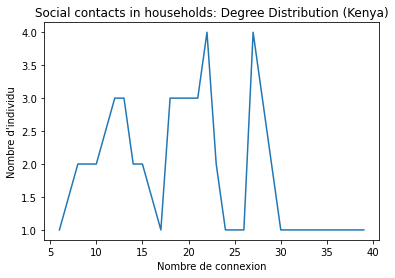

In [66]:
G = nx.Graph()

def plot_degree_distribution_kenya():  
    G = init_data_within()
    degs = {}
    for node in G.nodes():
        # ressort le noeud (l'individu) et le nombres de connexions qui sortent
        # ou qui entrent... 
        # print (node, G.degree(node))
        deg = G.degree(node)
        if deg not in degs:
            degs[deg] = 0
        degs[deg] +=1
    items = sorted(degs.items())
    #ressort le nombres de connexions et combiens de fois ce nombres
    # de connexion a été trouvé parmi les individus...
    # print(items)
    fig = plt.figure()
    ax=fig.add_subplot(111)
    ax.plot ([k for (k,v) in items] , [ v for (k,v) in items])
    ax.set_xscale ('linear')
    ax.set_yscale('linear')
    plt.xlabel("Nombre de connexion")
    plt.ylabel("Nombre d'individu")
    plt.title("Social contacts in households: Degree Distribution (Kenya)")
    fig.savefig("degree_distribution.png")


plot_degree_distribution_kenya()

### Dataset withing (other proposal)

average degree : 20.382978723404253
pk : [(6, 0.02127659574468085), (8, 0.0425531914893617), (10, 0.0425531914893617), (12, 0.06382978723404255), (13, 0.06382978723404255), (14, 0.0425531914893617), (15, 0.0425531914893617), (17, 0.02127659574468085), (18, 0.06382978723404255), (19, 0.06382978723404255), (20, 0.06382978723404255), (21, 0.06382978723404255), (22, 0.0851063829787234), (23, 0.0425531914893617), (24, 0.02127659574468085), (26, 0.02127659574468085), (27, 0.0851063829787234), (30, 0.02127659574468085), (32, 0.02127659574468085), (33, 0.02127659574468085), (34, 0.02127659574468085), (35, 0.02127659574468085), (37, 0.02127659574468085), (39, 0.02127659574468085)]


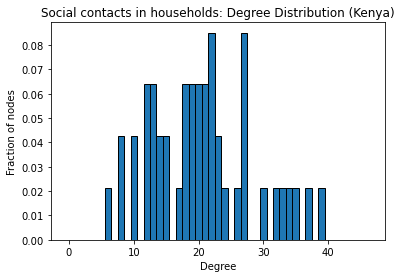

In [88]:
def plot_degree_distribution_kenya():  
    G = init_data_within()
    n_nodes = G.number_of_nodes()
    degs = np.zeros(n_nodes, dtype=int)
    for node in G.nodes():
        # ressort le noeud (l'individu) et le nombres de connexions qui sortent
        # ou qui entrent... 
        # print (node, G.degree(node))
        deg = G.degree(node)
        degs[deg] += 1
    
    #get p(k) distribution
    degree_distribution = np.zeros(n_nodes, dtype=float)
    degree_distribution = list(map(lambda d : float(d)/n_nodes ,degs)) 
    avg_degree = sum([k*pk for (k, pk) in enumerate(degree_distribution)])
    print(f'average degree : {avg_degree}')
    print(f'pk : {list(filter(lambda x : x[1] != 0,[(k, i) for k, i in enumerate(degree_distribution)]))}')
    
    #ressort le nombres de connexions et combiens de fois ce nombres
    # de connexion a été trouvé parmi les individus...
    # print(items)
    fig2 = plt.figure()
    ax=fig2.add_subplot(111)
    ax.bar(range(n_nodes), degree_distribution, width=1.0, edgecolor='black')
    plt.xlabel("Degree")
    plt.ylabel("Fraction of nodes")
    plt.title("Social contacts in households: Degree Distribution (Kenya)")
    fig2.savefig("degree_distribution.png")

plot_degree_distribution_kenya()

## Dataset accross

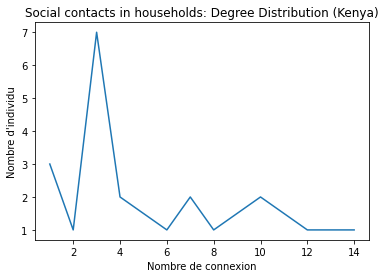

In [10]:
def plot_degree_distribution_kenya():  
    G = init_data_accross()
    degs = {}
    for node in G.nodes():
        # ressort le noeud (l'individu) et le nombres de connexions qui sortent
        # ou qui entrent... 
        # print (node, G.degree(node))
        deg = G.degree(node)
        if deg not in degs:
            degs[deg] = 0
        degs[deg] +=1
    items = sorted(degs.items())
    #ressort le nombres de connexions et combiens de fois ce nombres
    # de connexion a été trouvé parmi les individus...
    # print(items)
    fig = plt.figure()
    ax=fig.add_subplot(111)
    ax.plot ([k for (k,v) in items] , [ v for (k,v) in items])
    ax.set_xscale ('linear')
    ax.set_yscale('linear')
    plt.xlabel("Nombre de connexion")
    plt.ylabel("Nombre d'individu")
    plt.title("Social contacts in households: Degree Distribution (Kenya)")
    fig.savefig("degree_distribution.png")


plot_degree_distribution_kenya()

### Dataset Accross (other proposal)

average degree : 5.142857142857142


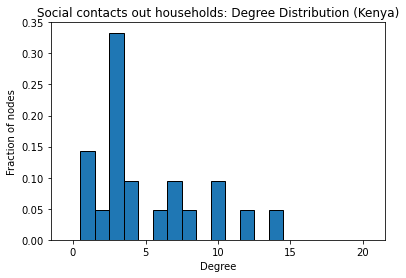

In [14]:
def plot_degree_distribution_kenya(): 
    G = init_data_accross()
    n_nodes = G.number_of_nodes()
    degs = np.zeros(n_nodes, dtype=int)
    for node in G.nodes():
        # ressort le noeud (l'individu) et le nombres de connexions qui sortent
        # ou qui entrent... 
        # print (node, G.degree(node))
        deg = G.degree(node)
        degs[deg] += 1
    
    #get p(k) distribution
    degree_distribution = np.zeros(n_nodes, dtype=float)
    degree_distribution = list(map(lambda d : float(d)/n_nodes ,degs))
    avg_degree = sum([k*pk for (k, pk) in enumerate(degree_distribution)])
    print(f'average degree : {avg_degree}')
    
    #ressort le nombres de connexions et combiens de fois ce nombres
    # de connexion a été trouvé parmi les individus...
    # print(items)
    fig2 = plt.figure()
    ax=fig2.add_subplot(111)
    ax.bar(range(n_nodes), degree_distribution, width=1.0, edgecolor='black')
    plt.xlabel("Degree")
    plt.ylabel("Fraction of nodes")
    plt.title("Social contacts out households: Degree Distribution (Kenya)")
    fig2.savefig("degree_distribution.png")

plot_degree_distribution_kenya()

## Else

[(1, 1), (2, 1), (3, 3)]
[(1, 75), (2, 98), (3, 93), (4, 99), (5, 93), (6, 98), (7, 98), (8, 111), (9, 100), (10, 95), (11, 81), (12, 82), (13, 79), (14, 87), (15, 106), (16, 82), (17, 76), (18, 73), (19, 72), (20, 63), (21, 52), (22, 63), (23, 53), (24, 60), (25, 55), (26, 56), (27, 49), (28, 37), (29, 38), (30, 40), (31, 38), (32, 44), (33, 35), (34, 43), (35, 36), (36, 43), (37, 43), (38, 44), (39, 29), (40, 27), (41, 29), (42, 21), (43, 29), (44, 21), (45, 19), (46, 24), (47, 24), (48, 24), (49, 33), (50, 25), (51, 20), (52, 19), (53, 15), (54, 23), (55, 23), (56, 18), (57, 23), (58, 15), (59, 11), (60, 18), (61, 18), (62, 16), (63, 23), (64, 13), (65, 20), (66, 22), (67, 13), (68, 16), (69, 14), (70, 17), (71, 18), (72, 15), (73, 10), (74, 10), (75, 8), (76, 15), (77, 10), (78, 11), (79, 16), (80, 8), (81, 4), (82, 12), (83, 17), (84, 12), (85, 10), (86, 9), (87, 5), (88, 9), (89, 9), (90, 7), (91, 9), (92, 10), (93, 11), (94, 7), (95, 9), (96, 11), (97, 8), (98, 5), (99, 11), (10

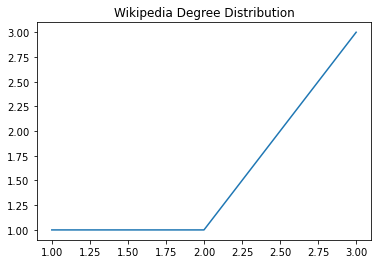

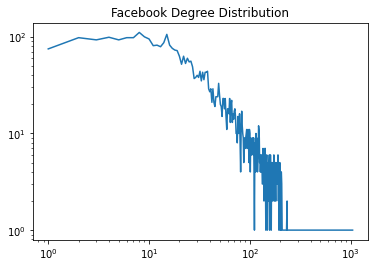

In [12]:
#fonctionne bien avec le txt yahoo ;-)
def plot_degree_distribution2():
    degs = {}
    file = 'yahoo.txt'
    wiki = nx.read_adjlist(file, delimiter= ',' ,create_using = nx.DiGraph())
    
    for n in wiki.nodes():
        deg = wiki.degree(n)
        if deg not in degs:
            degs[deg] = 0
        degs[deg] +=1
    items = sorted(degs.items())
    print(items)
    fig = plt.figure()
    ax=fig.add_subplot(111)
    ax.plot ([k for (k,v) in items] , [ v for (k,v) in items])
    ax.set_xscale ('linear')
    ax.set_yscale('linear')
    plt.title("Wikipedia Degree Distribution")
    fig.savefig("degree_distribution2.png")

plot_degree_distribution2()

# marche pour facebook
def plot_degree_distribution3():
    degs = {}
    file = 'facebook_combined.txt'
    wiki = nx.read_adjlist(file, delimiter= ' ' ,create_using = nx.DiGraph())
    
    for n in wiki.nodes():
        deg = wiki.degree(n)
        if deg not in degs:
            degs[deg] = 0
        degs[deg] +=1
    items = sorted(degs.items())
    print(items)
    fig = plt.figure()
    ax=fig.add_subplot(111)
    ax.plot ([k for (k,v) in items] , [ v for (k,v) in items])
    ax.set_xscale ('log')
    ax.set_yscale('log')
    plt.title("Facebook Degree Distribution")
    fig.savefig("degree_distribution3.png")

plot_degree_distribution3()

# Graph Kenya pour le dataset within

In [13]:
def display_nodes_edges_print_graph_csv_within():
    G = init_data_within()

    G_nodes = G.number_of_nodes()
    G_edges = G.number_of_edges()
    print("Nodes = ", G_nodes, " Edges = ",G_edges)
    #permet d'afficher les noeuds et liens du Graphe G
    print(nx.info(G))
    #L'affichage avec l'option suivante ne fonctionne pas chez moi donc capture d'écran
    fig = plt.figure(figsize=(20,20))
    nx.draw_networkx(G)
    fig.savefig("dessin_graphe_kenya_within.png")

# Ligne ci-desssous à décommenter pour tester
display_nodes_edges_print_graph_csv_within()

Nodes =  47  Edges =  479
Name: 
Type: Graph
Number of nodes: 47
Number of edges: 479
Average degree:  20.3830


NetworkXError: random_state_index is incorrect

<Figure size 1440x1440 with 0 Axes>

# Graph Kenya pour le dataset accross

In [ ]:
def display_nodes_edges_print_graph_csv_accross():
    G = init_data_accross()

    G_nodes = G.number_of_nodes()
    G_edges = G.number_of_edges()
    print("Nodes = ", G_nodes, " Edges = ",G_edges)
    #permet d'afficher les noeuds et liens du Graphe G
    print(nx.info(G))
    #L'affichage avec l'option suivante ne fonctionne pas chez moi donc capture d'écran
    fig = plt.figure(figsize=(20,20))
    nx.draw_networkx(G)
    fig.savefig("dessin_graphe_kenya_accross.png")

# Ligne ci-desssous à décommenter pour tester
display_nodes_edges_print_graph_csv_accross()

# Configuration de modèle

## Dataset within

In [ ]:
# get data
G = init_data_within()
# get sequence of degree
degree_sequence = [d for n, d in G.degree()]
print(degree_sequence)
#use configuration model method
G= nx.configuration_model(degree_sequence)

G_nodes = G.number_of_nodes()
G_edges = G.number_of_edges()
print("Nodes = ", G_nodes, " Edges = ",G_edges)
#permet d'afficher les noeuds et liens du Graphe G
print(nx.info(G))
#L'affichage avec l'option suivante ne fonctionne pas chez moi donc capture d'écran
fig = plt.figure(figsize=(20,20))
nx.draw_networkx(G)


## Dataset Accross

In [ ]:
# get data
G = init_data_accross()
# get sequence of degree
degree_sequence = [d for n, d in G.degree()]
print(degree_sequence)
#use configuration model method
G1= nx.configuration_model(degree_sequence)

G_nodes = G1.number_of_nodes()
G_edges = G1.number_of_edges()
print("Nodes = ", G_nodes, " Edges = ",G_edges)
#permet d'afficher les noeuds et liens du Graphe G
print(nx.info(G))
#L'affichage avec l'option suivante ne fonctionne pas chez moi donc capture d'écran
fig = plt.figure(figsize=(20,20))
nx.draw_networkx(G1)

# Détection de communautés

## Dataset within

In [ ]:
# via fichier csv 
def display_communautes():
    G = init_data_within()

    G_nodes = G.number_of_nodes()
    G_edges = G.number_of_edges()
    print("Nodes = ", G_nodes, " Edges = ",G_edges)

    #permet d'afficher les noeuds et liens du Graphe G
    print(nx.info(G))

    # compute the best partition
    partition = community_louvain.best_partition(G)
    print(partition)

    # la modularité
    print("Modularité:",modularity(partition,G))

    # draw the graph
    pos = nx.spring_layout(G)
    # color the nodes according to their partition
    cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
    nx.draw_networkx_labels(G, pos=pos,font_size=10)
    nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=120,
    cmap=cmap, node_color=list(partition.values()))
    nx.draw_networkx_edges(G, pos, alpha=0.5)
    plt.show()

display_communautes()

## Dataset accross

In [ ]:
# via fichier csv 
def display_communautes():
    G = init_data_accross()
    
    G_nodes = G.number_of_nodes()
    G_edges = G.number_of_edges()
    print("Nodes = ", G_nodes, " Edges = ",G_edges)

    #permet d'afficher les noeuds et liens du Graphe G
    print(nx.info(G))

    # compute the best partition
    partition = community_louvain.best_partition(G)
    print(partition)

    # la modularité
    print("Modularité:",modularity(partition,G))

    # draw the graph
    pos = nx.spring_layout(G)
    # color the nodes according to their partition
    cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
    nx.draw_networkx_labels(G, pos=pos,font_size=10)
    nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=120,
    cmap=cmap, node_color=list(partition.values()))
    nx.draw_networkx_edges(G, pos, alpha=0.5)
    plt.show()

display_communautes()